# TP introduction to Machine Learning
Diane Lingrand (diane.lingrand@univ-cotedazur)

Julie Tores (julie.tores@univ-cotedazur.fr ou julie.tores@etu.univ-cotedazur.fr)

Polytech, SI4, 2023-24

In [2]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## dataset: Iris

In [3]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Question 1:** how many data ?

In [4]:
# your code
print("the number of data we have is : ",y.size)

the number of data we have is :  150


**Question 2**: type of data ? dimension of data ? type of labels ?

In [5]:
# your code
print("the type of data is : ",X.dtype)
print("the dimension of our data is : ",X.shape)
print("the type of labels is : ",y.dtype)

the type of data is :  float64
the dimension of our data is :  (150, 4)
the type of labels is :  int32


**Question 3:** How many classes ? How many samples per class ?

In [6]:
# your code
print("the number of classes we have is : ",np.unique(y).size)
print("the number of samples for class 1 is : ",y[y==0].size)
print("the number of samples for class 2 is : ",y[y==1].size)
print("the number of samples for class 3 is : ",y[y==2].size)

the number of classes we have is :  3
the number of samples for class 1 is :  50
the number of samples for class 2 is :  50
the number of samples for class 3 is :  50


**Question 4:** choose 2 dimensions and plot the data in the plane using a different color for each class.

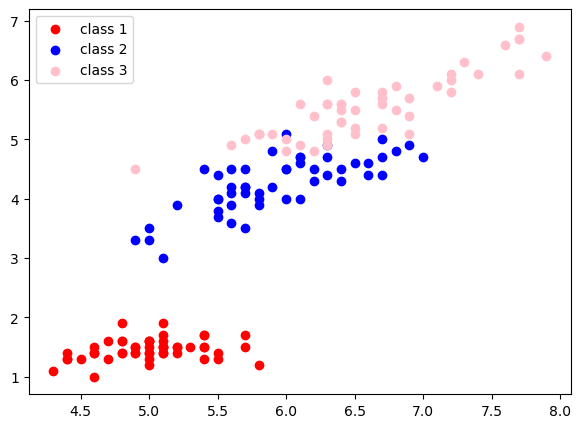

In [7]:
# your code
plt.figure(figsize=(7,5))
plt.scatter(X[y==0,0],X[y==0,2],color='red',label='class 1')
plt.scatter(X[y==1,0],X[y==1,2],color='blue',label='class 2')
plt.scatter(X[y==2,0],X[y==2,2],color='pink',label='class 3')
plt.legend()
plt.show()

**Question 5:** perfect classification. What are the metrics values ? Read the documention of metrics function in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [8]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# here is an example for accuracy: 
print("accuracy of the perfect classification", accuracy_score(y, y))
# plot also the recall, F1-measures, confusion matrix
y0=[]
for i in range(len(y)):
    if y[i]!=0:
        y0.append(1)
    else:
        y0.append(y[i])
    
print("recall for class 0 : ", recall_score(y0,y0))
print("f1 score for class 0 : ",f1_score(y0,y0))
# confusion matrix
print("confusion matrix : \n",confusion_matrix(y,y))
# your code

accuracy of the perfect classification 1.0
recall for class 0 :  1.0
f1 score for class 0 :  1.0
confusion matrix : 
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


**Question 6**: random classification. What are the metrics values ? <br/>
*Hint*: use https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html for the generation of random labels. <br/>
Don't forget the confusion matrix. Hint: ConfusionMatrixDisplay https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

accuracy of the random classification 0.3933333333333333
recall for class 1 :  0.62
f1 score for class 1 :  0.6294416243654821
recall for class 2 :  0.38
f1 score for class 2 :  0.40860215053763443
recall for class 3 :  0.71
f1 score for class 3 :  0.7244897959183674
confusion matrix : 
 [[15 18 17]
 [19 19 12]
 [19  6 25]]


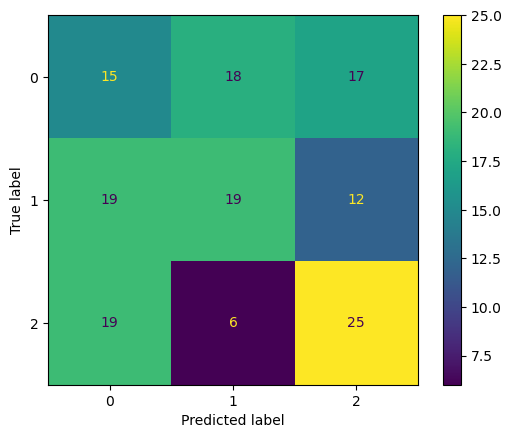

In [9]:
from numpy.random import randint
yRandom = np.random.randint(3,size=150)


# here is an example for accuracy: 
print("accuracy of the random classification", accuracy_score(y, yRandom))
# plot also the recall, F1-measures, confusion matrix
# class 1
yClass1 = [1 if val != 0 else val for val in y]
yRandom1 = [1 if val != 0 else val for val in yRandom]
print("recall for class 1 : ", recall_score(yClass1,yRandom1))
print("f1 score for class 1 : ",f1_score(yClass1,yRandom1))
# class 2
yClass2 = [0 if val != 1 else val for val in y]
yRandom2 = [0 if val != 1 else val for val in yRandom]
print("recall for class 2 : ", recall_score(yClass2,yRandom2))
print("f1 score for class 2 : ",f1_score(yClass2,yRandom2))
# class 3
yClass3 = [1 if val != 2 else val for val in y]
yRandom3 = [1 if val != 2 else val for val in yRandom]
print("recall for class 3 : ", recall_score(yClass3,yRandom3))
print("f1 score for class 3 : ",f1_score(yClass3,yRandom3))
# confusion matrix
print("confusion matrix : \n",confusion_matrix(y,yRandom))
# plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y,yRandom)
plt.show()

### binary classification

In [10]:
# we choose to remove class with label 2 (Iris Virginica)
XBinaire = X[y!=2]
yBinaire = y[y!=2]


In [11]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XBinaire, yBinaire, test_size=0.4)

**Question 7**: Try to build a classifier better than the random one, use the thresholding on one or more component. Choose the thresholds using the train dataset and compute the metrics on the test dataset.
    

Using the graph in the question 4 : 

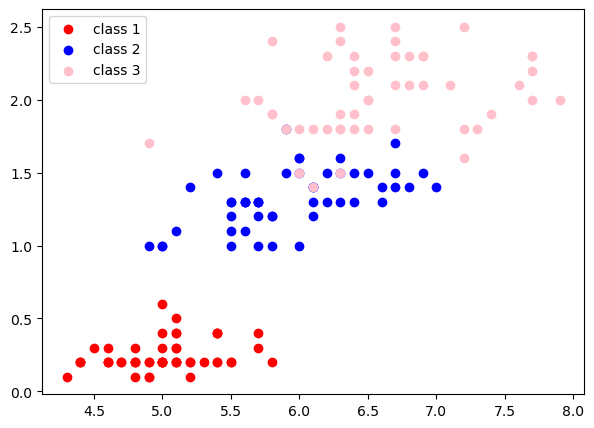

In [12]:
# your code
plt.figure(figsize=(7,5))
plt.scatter(X[y==0,0],X[y==0,3],color='red',label='class 1')
plt.scatter(X[y==1,0],X[y==1,3],color='blue',label='class 2')
plt.scatter(X[y==2,0],X[y==2,3],color='pink',label='class 3')
plt.legend()
plt.show()

We can deduce that we can divide classes 1 and 2 using a threshhold corresponding to the coordinates 2 of the X data, the petal lenght of 2.5 seems sufficient to divide the data.

In [13]:
threshhold=2.5
y_pred_train=(X_train[:,2] > threshhold).astype(int)

# print metrics
print("accuracy : ",accuracy_score(y_train,y_pred_train))
print("recall score : ",recall_score(y_train,y_pred_train))
print("f1 score : ",f1_score(y_train,y_pred_train))

y_pred_test = (X_test[:,2] > threshhold).astype(int)
print("for the tests :")
# print metrics
print("accuracy : ",accuracy_score(y_test,y_pred_test))
print("recall score : ",recall_score(y_test,y_pred_test))
print("f1 score : ",f1_score(y_test,y_pred_test))

accuracy :  1.0
recall score :  1.0
f1 score :  1.0
for the tests :
accuracy :  1.0
recall score :  1.0
f1 score :  1.0


**Question 8**: Using this method, could you propose an algorithm for classifying the 3 classes?

In [14]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)  

In [1]:
threshold0 = 0.75
threshold1 = 1.65
y_pred_train = [0 for _ in range(len(y_train))]
y_pred_test = [0 for _ in range(len(y_test))]

# Prediction for training data
for i in range(len(y_train)):
    if (threshold0 < X_train[i, 3]) and (X_train[i, 3] < threshold1):
        y_pred_train[i] = 1
    elif X_train[i, 3] > threshold1:
        y_pred_train[i] = 2

# Prediction for testing data
for i in range(len(y_test)):
    if (threshold0 < X_test[i, 3]) and (X_test[i, 3] < threshold1):
        y_pred_test[i] = 1
    elif X_test[i, 3] > threshold1:
        y_pred_test[i] = 2

# Compute accuracy on the test data
print("Test accuracy:", accuracy_score(y_test, y_pred_test))
print("Test accuracy:", accuracy_score(y_train, y_pred_train))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

NameError: name 'y_train' is not defined

### Classification using decision trees

Test accuracy: 1.0


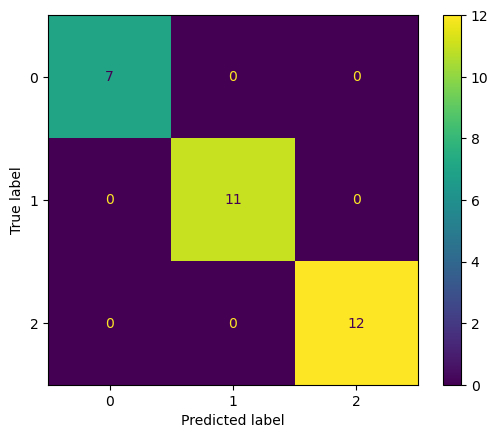

In [16]:
from sklearn import tree
best_depth = None
best_min_samples = None
best_acc = 0

for depth in range(1,10):
    for min_samples in range(2,10):
        myTree = tree.DecisionTreeClassifier(max_depth=depth,min_samples_split=min_samples)
        myTree.fit(X_train, y_train)
        ypred = myTree.predict(X_val)
        if accuracy_score(y_val, ypred) > best_acc :
            best_depth=depth
            best_min_samples=min_samples

myTree = tree.DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_min_samples)
myTree.fit(X_test,y_test)
y_test_pred=myTree.predict(X_test)
# Compute accuracy on the validation data
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

In [17]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [18]:
import graphviz
dot_data = tree.export_graphviz(myTree, out_file=None, 
                                feature_names="feat",  # replace with your feature names
                                class_names="classes",     # replace with your class names
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.view()  


'Source.gv.pdf'

## dataset: digit

In [19]:
# reading the dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

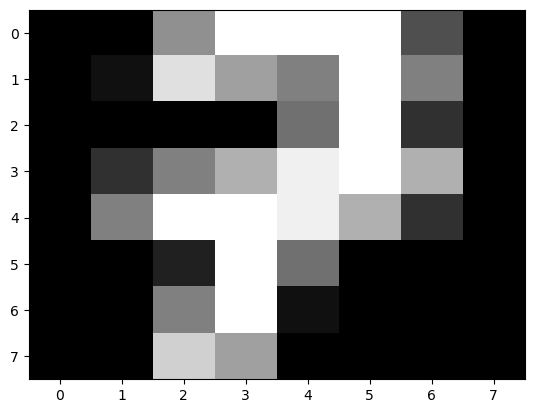

class =  7


In [20]:
#display one of the pictures (the 22th in this code)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
i = 44 #index of the image: change it in order to display other images
plt.imshow(X[i].reshape((8,8)),aspect="auto",cmap='gray')
plt.show()
print('class = ', y[i])

**Question 9**: Using the digit dataset, answer again to the previous questions from 1 to 8.

In [21]:
print("the number of data we have is : ",y.size)

the number of data we have is :  1797


In [22]:
print("the type of data is : ",X.dtype)
print("the dimension of our data is : ",X.shape)
print("the type of labels is : ",y.dtype)

the type of data is :  float64
the dimension of our data is :  (1797, 64)
the type of labels is :  int32


In [23]:
print("the number of classes we have is : ",np.unique(y).size)
for i in range(9):
    print("the number of samples for class ",i," is : ",y[y==i].size)

the number of classes we have is :  10
the number of samples for class  0  is :  178
the number of samples for class  1  is :  182
the number of samples for class  2  is :  177
the number of samples for class  3  is :  183
the number of samples for class  4  is :  181
the number of samples for class  5  is :  182
the number of samples for class  6  is :  181
the number of samples for class  7  is :  179
the number of samples for class  8  is :  174


C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


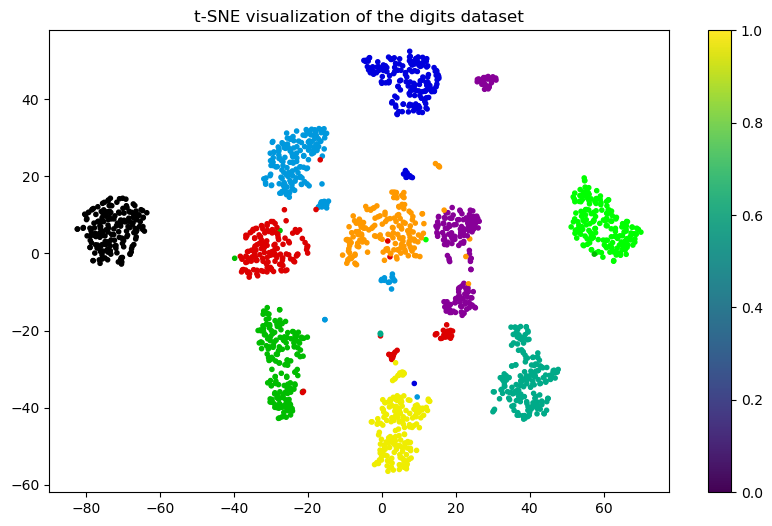

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
nbCl = len(set(y))  # Number of unique classes in y
colors = [cm.nipy_spectral(float(i) / nbCl) for i in range(nbCl)]
col = [colors[c] for c in y]

plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=col, marker=".")
plt.colorbar()  # This will show the class/color mapping
plt.title("t-SNE visualization of the digits dataset")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25,random_state=42)  

best depth :  14
best_min_samples : 14
Test accuracy: 0.9166666666666666


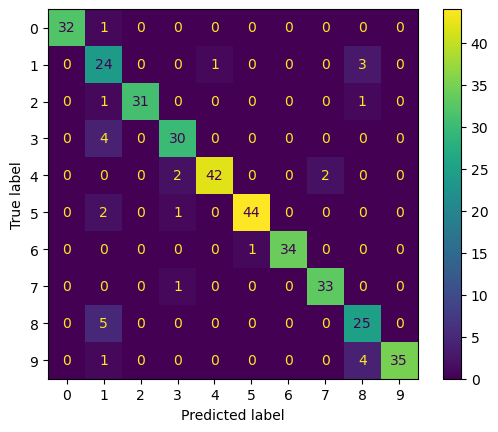

In [26]:
from sklearn import tree
best_depth = None
best_min_samples = None

best_acc = 0

for depth in range(1,15):
    for min_samples in range(2,15):
        myTree = tree.DecisionTreeClassifier(max_depth=depth,min_samples_split=min_samples,criterion="entropy")
        myTree.fit(X_train, y_train)
        ypred = myTree.predict(X_val)
        if accuracy_score(y_val, ypred) > best_acc :
            best_depth=depth
            best_min_samples=min_samples
print("best depth : ",best_depth)
print("best_min_samples :",best_min_samples)
myTree = tree.DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_min_samples,criterion="entropy")
myTree.fit(X_test,y_test)
y_test_pred=myTree.predict(X_test)
# Compute accuracy on the validation data
print("Test accuracy:", accuracy_score(y_test, y_test_pred))
# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

In [27]:
import graphviz
dot_data = tree.export_graphviz(myTree, out_file=None,
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.view()  


'Source.gv.pdf'

# PCA vs t-SNE - DIGITS DATASET


In [80]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25,random_state=42) 

smallest dimension where 95% of variance is explained :  27
the proportion of explained variencre in dimension 2 is :  0.28500906519316893


C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


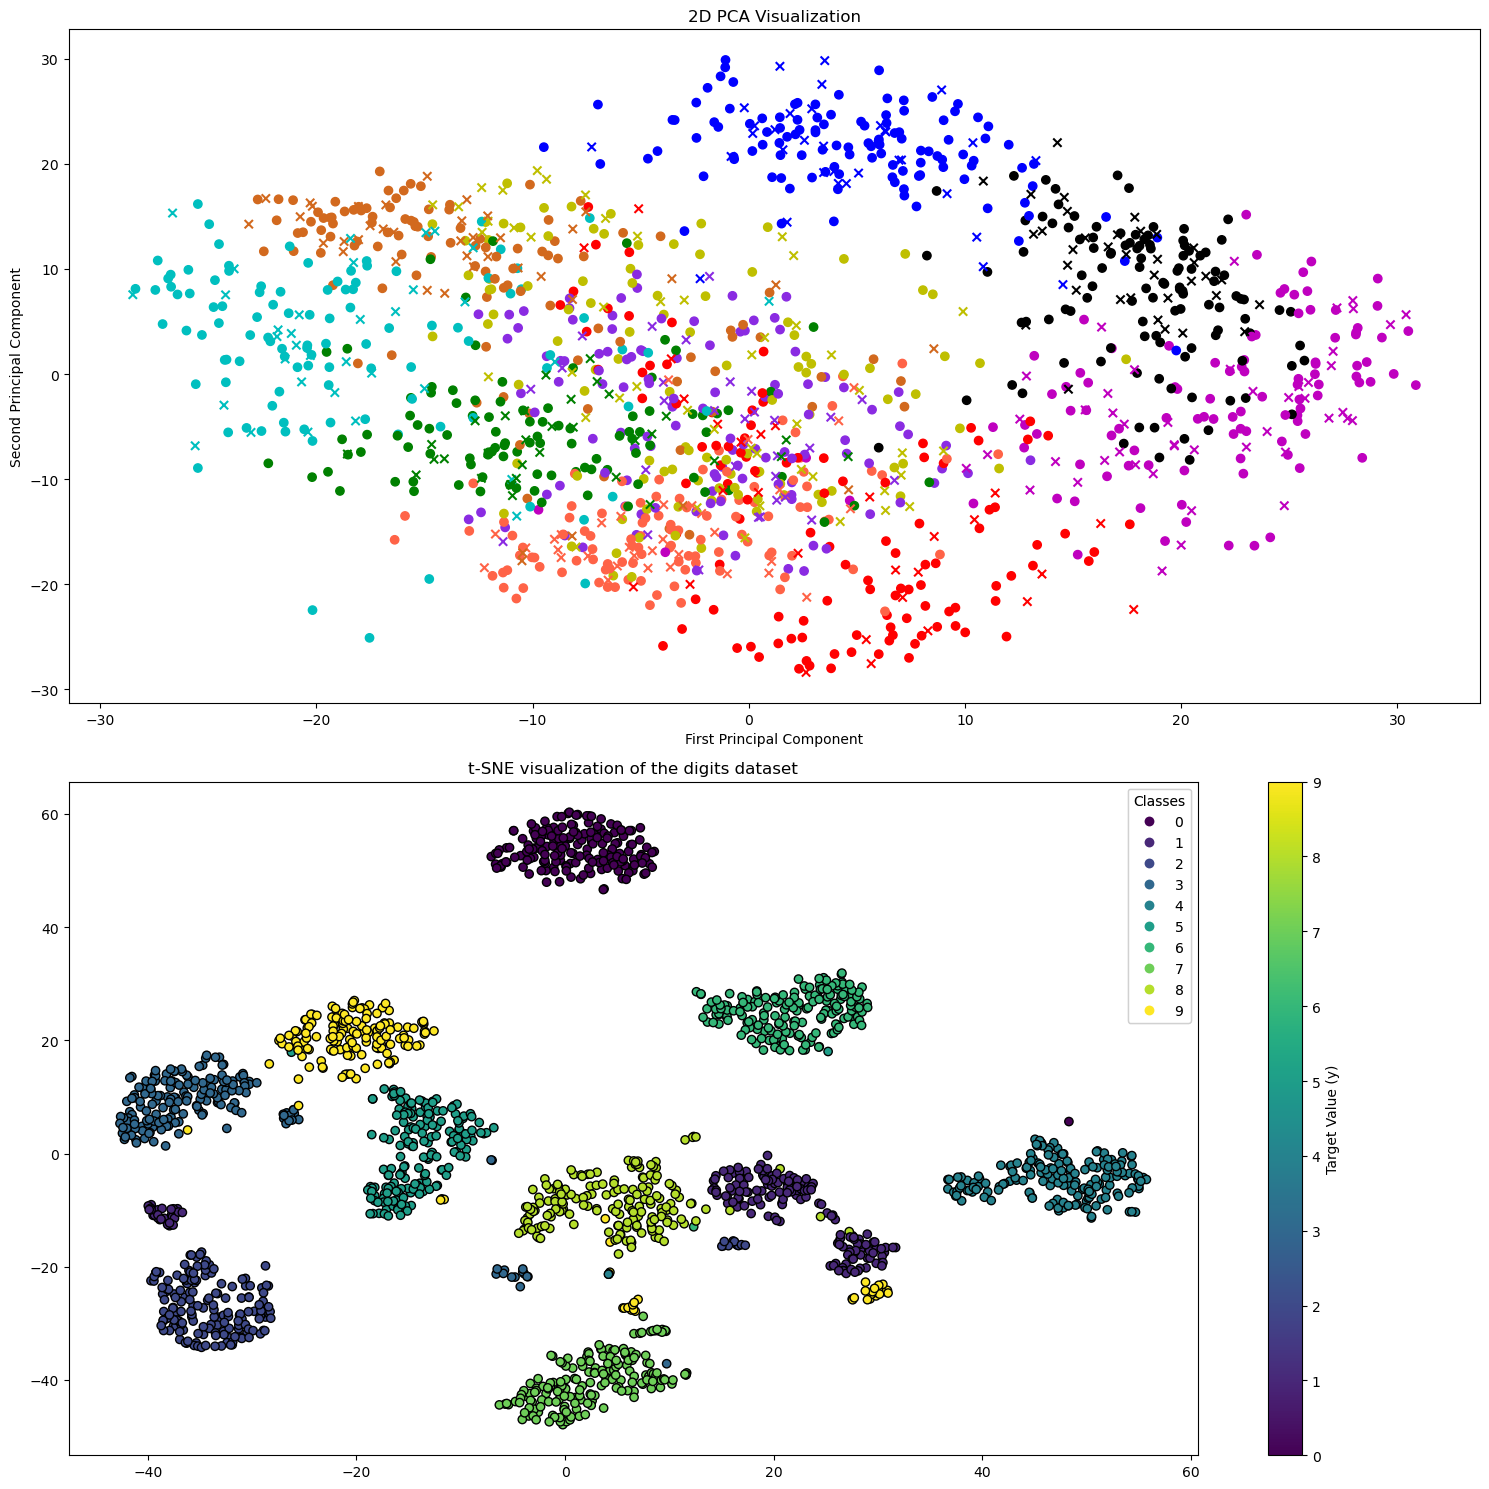

In [87]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import manifold

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

# PCA
pca = PCA(n_components = 64)
pca.fit(X_train)
X_final = pca.transform(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
smallest_dimension = np.where(cumulative_variance > 0.95)[0][0]
print("smallest dimension where 95% of variance is explained : ", smallest_dimension)
pca2 = PCA(n_components=2)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_val = pca.transform(X_val)
X_pca_test = pca.transform(X_test)
print("the proportion of explained variencre in dimension 2 is : ",cumulative_variance[1])

# Assuming y_train and y_test are defined
col_train = [colors[c] for c in y_train]
col_test = [colors[c] for c in y_test]

# PCA Visualization
ax[0].scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=col_train, marker="o")
ax[0].scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=col_test, marker="x")
ax[0].set_xlabel('First Principal Component')
ax[0].set_ylabel('Second Principal Component')
ax[0].set_title('2D PCA Visualization')

# t-SNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=40)
X_tsne = tsne.fit_transform(X)
scatter = ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolor='k')
fig.colorbar(scatter, ax=ax[1]).set_label('Target Value (y)')
legend1 = ax[1].legend(*scatter.legend_elements(), title="Classes")
ax[1].add_artist(legend1)
ax[1].set_title('t-SNE visualization of the digits dataset')

plt.tight_layout()
plt.show()


### PCA vs t-SNE

**PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding)** are both techniques for dimensionality reduction but serve different purposes.
- PCA is a linear method, ideal for quickly visualizing data and understanding its variance structure; it projects data onto orthogonal axes that capture the most variance. However, PCA can't grasp non-linear relationships. On the other hand, t-SNE is a non-linear technique, superb at visualizing clusters in complex datasets like images or texts.
- t-SNE can highlight intricate structures, it's computationally intensive and can vary across runs without a fixed seed. In practice, these methods can be complementary: PCA is often used for initial dimensionality reduction for efficiency, followed by t-SNE for detailed 2D or 3D visualizations, combining the speed of PCA with the visualization depth of t-SNE.

# Decision tree using PCA and t-SNE

 ## Using PCA

best depth :  14
best_min_samples : 14
Test accuracy: 0.9416666666666667


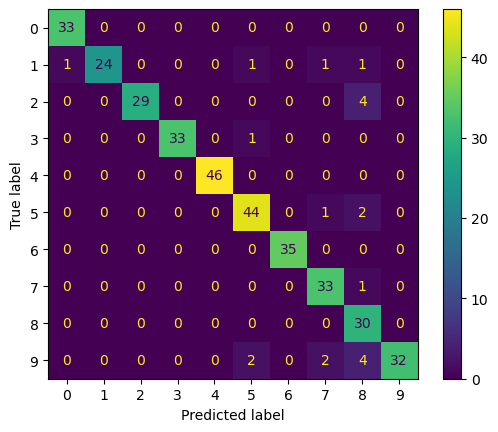

In [86]:
from sklearn import tree
best_depth = None
best_min_samples = None

best_acc = 0

for depth in range(1,15):
    for min_samples in range(2,15):
        myTree = tree.DecisionTreeClassifier(max_depth=depth,min_samples_split=min_samples,criterion="entropy")
        myTree.fit(X_pca_train, y_train)
        ypred = myTree.predict(X_pca_val)
        if accuracy_score(y_val, ypred) > best_acc :
            best_depth=depth
            best_min_samples=min_samples
print("best depth : ",best_depth)
print("best_min_samples :",best_min_samples)
myTree = tree.DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_min_samples,criterion="entropy")
myTree.fit(X_pca_test,y_test)
y_test_pred=myTree.predict(X_pca_test)
# Compute accuracy on the validation data
print("Test accuracy:", accuracy_score(y_test, y_test_pred))
# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

we note that this classification has produced better results than applying the decision tree directly.